In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [4]:
import pandas as pd
df = pd.read_csv("results/ai_decision.csv")

In [12]:
text = " ".join(df["keywords"][df.decision==1].to_list())

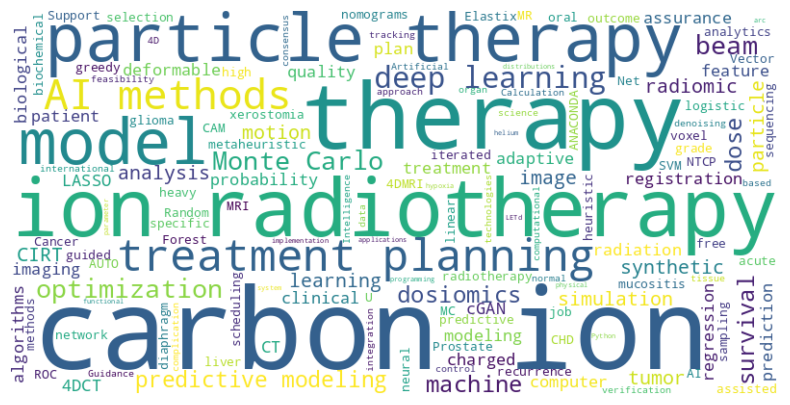

In [13]:
# Sample text
# text = """
# Python is amazing. Seaborn makes beautiful plots.
# Word clouds are a fun way to visualize text data.
# Machine learning, deep learning, AI, data science.
# """

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=0).generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
# plt.title('Word Cloud Example with Seaborn Style', fontsize=20)
plt.show()


In [2]:
!pip install gensim nltk pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 19.9 MB/s eta 0:00:0000:0100:01
  Installing build dependedone
  Getting requirements to build wheel ... one
  Preparing metadata (pyproject.toml) ... one
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 22.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencdone
  Getting requirements to build wheel ... done
  Installing backend dependencies ... one
done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 24.7 MB/s eta 0:00:0000:0100:01
  Installing build done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... one
  Preparing metadata (pyproject.toml) ... rror
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      + meson setup /tmp/pip-install-maoj51vu/scipy_651a0733e516427b994926a6ef7133dd /tmp/pip-install-maoj51vu/scipy_651a0733e516427b994926a6ef7133dd/.mesonpy-bhgvis9

In [3]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# LDA (Latent Dirichlet Allocation) in Python to find topics (clusters) from text. is a topic modeling technique.; It tries to find hidden topics in a # large amount of text.# Each document is a mixture of topics; each topic is a mixture of words. It's unsupervised — you don’t label anything manually.

import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import gensim
import pprint

# Download NLTK stopwords (if not already done)
nltk.download('stopwords')

# Sample documents
documents = [
    "I love deep learning and neural networks",
    "Data science is my passion, I love statistics",
    "Python programming for machine learning and AI",
    "R is great for statistics and data analysis",
    "Artificial intelligence and machine learning are the future",
    "Statistics is key for data science"
]

# Preprocessing
stop_words = stopwords.words('english')

texts = [
    [word.lower() for word in doc.split() if word.lower() not in stop_words]
    for doc in documents
]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=2,      # number of topics you want
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Show topics
pprint.pprint(lda_model.print_topics())